In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [3]:
!cd yolov5 & pip install -r requirements.txt  

Defaulting to user installation because normal site-packages is not writeable
  Using cached setuptools-75.5.0-py3-none-any.whl.metadata (6.8 kB)
   ---------------------------------------- 0.0/887.4 kB ? eta -:--:--
   ----- ---------------------------------- 122.9/887.4 kB 3.6 MB/s eta 0:00:01
   -------------- ------------------------- 317.4/887.4 kB 3.9 MB/s eta 0:00:01
   ------------------------------- -------- 706.6/887.4 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 887.4/887.4 kB 5.1 MB/s eta 0:00:00
Using cached setuptools-75.5.0-py3-none-any.whl (1.2 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Installed all the requirements we needed till now

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

Loading the Model Now:

In [5]:
# loading the small model to keep things lightweight
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

C:\ProgramData\anaconda3\Lib\site-packages\torch\hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Yash/.cache\torch\hub\master.zip


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Yash\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5  2024-11-19 Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)

100%|█████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:02<00:00, 5.33MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [10]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [11]:
results = model(img)
results.print()

C:\Users\Yash/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 533x800 28 cars, 5 trucks
Speed: 820.0ms pre-process, 100.4ms inference, 291.7ms NMS per image at shape (1, 3, 448, 640)


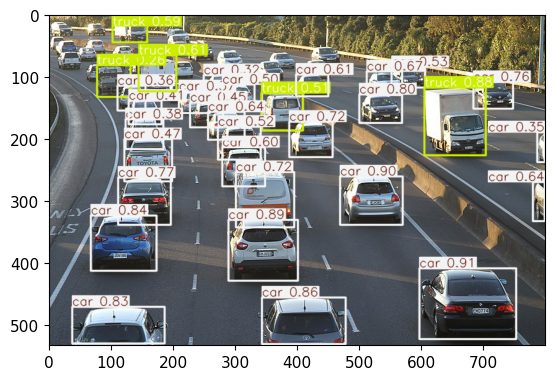

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [13]:
results.render()

[array([[[251, 216, 174],
         [254, 219, 177],
         [246, 213, 168],
         ...,
         [128, 148, 146],
         [ 70,  79,  52],
         [ 64,  71,  29]],
 
        [[235, 201, 156],
         [234, 200, 155],
         [221, 189, 142],
         ...,
         [122, 141, 139],
         [ 85,  91,  65],
         [ 47,  52,  11]],
 
        [[253, 219, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [136, 155, 153],
         [ 69,  73,  46],
         [ 60,  62,  22]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

Now doing this in real time, i.e. real time recordings

In [45]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

C:\Users\Yash/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yash/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yash/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yash/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yash/.cache\torch\hub\ultralytics_yolov5_master\models\comm

Training our custom model

In [22]:
import uuid # unique identifier
import os
import time

In [27]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [ ]:
label[0] + '.' + str.

In [44]:
os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1())+'.jpg')

data\images\drowsy.675e46dd-a67f-11ef-b945-e8fb1c0002e6.jpg


In [48]:
cap = cv2.VideoCapture(0)
for label in labels:
    print("Collecting images for {}".format(labels))
    time.sleep(5)
    # loop for num_images (20 here) images
    for img_num in range(number_imgs):
        print("Collecting images for {}, image number {}".format(label, img_num))

        # webcam feed
        ret, frame = cap.read()
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1())+'.jpg')
        # Writes out image to file
        cv2.imwrite(imgname, frame)
        # render to the screen
        cv2.imshow('Image Collection', frame)
        # delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [35]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        # imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        # print(imgname)

In [49]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...


In [50]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Defaulting to user installation because normal site-packages is not writeable
  Using cached PyQt5-5.15.11-cp38-abi3-win_amd64.whl.metadata (2.1 kB)
  Using cached PyQt5_sip-12.15.0-cp312-cp312-win_amd64.whl.metadata (439 bytes)
  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl.metadata (552 bytes)
Using cached PyQt5-5.15.11-cp38-abi3-win_amd64.whl (6.9 MB)
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/3.8 MB 10.0 MB/s eta 0:00:01
   ---------- ----------------------------- 1.0/3.8 MB 10.8 MB/s eta 0:00:01
   ---------------- ----------------------- 1.5/3.8 MB 12.2 MB/s eta 0:00:01
   --------------------- ------------------ 2.1/3.8 MB 11.1 MB/s eta 0:00:01
   --------------------------- ------------ 2.7/3.8 MB 11.2 MB/s eta 0:00:01
   --------------------------------- ------ 3.2/3.8 MB 11.3 MB/s eta 0:00:01
   -------------------------------------- - 3.7/3.8 MB 11.2 MB/s eta 0:00:01
   ------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [74]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-385-gb968b2d7 Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, o

In [75]:
# load custom model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp4/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Yash/.cache\torch\hub\master.zip
YOLOv5  2024-11-20 Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [81]:
img = os.path.join('data', 'images', 'awake.208df2f1-a681-11ef-8dae-e8fb1c0002e6.jpg')

In [84]:
img = os.path.join('data', 'images', 'drowsy.3f7d5c86-a681-11ef-8082-e8fb1c0002e6.jpg')

In [85]:
results = model(img)

C:\Users\Yash/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [86]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 17.5ms pre-process, 24.3ms inference, 178.6ms NMS per image at shape (1, 3, 480, 640)


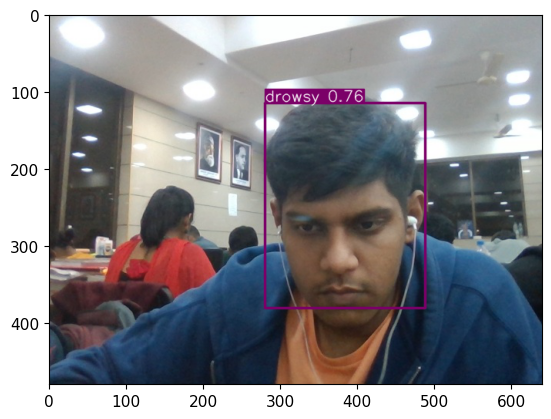

In [87]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [88]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

C:\Users\Yash/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yash/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yash/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yash/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yash/.cache\torch\hub\ultralytics_yolov5_master\models\comm

In [89]:
# Saving the model
torch.save(model, "model.pth")